<h0> <center> <b> The Global Printed Circulation of Art. <br> Reproductions of artworks circulating in the press from the 1850s to the 1960s. Visual Contagions.</b>
    
    
    Béatrice Joyeux-Prunel, université de Genève.
    Data : Visual Contagions, June 2023 (selected and cleaned in collaboration with Marie Barras). 
    
    https://visualcontagions.unige.ch/explore/analysis/collection/5/

Nearly 11 million illustrations were algorithmically extracted from a global corpus of illustrated magazines and then grouped based on visual similarities. The Visual Contagion team's work involved identifying reproductions of artworks within these images that appeared at least 3 times in the corpus. The team identified the artworks, their authors, and their creation dates. The list of authors was enriched using OpenRefine, incorporating information on the birth and death years and locations of the relevant artists, as well as their gender, sourced from Wikidata. 

The subsequent analysis focuses on evaluating the chronological and geographical distribution of this corpus, as well as exploring possible factors contributing to the circulation of the artworks in question.

# Corpus, Libraries

In [1]:
import os
import pandas as pd
import matplotlib as plt
            

In [2]:
#!pip install seaborn
import seaborn
seaborn.set()

In [3]:
import geopandas as gpd
from shapely.geometry import Point



In [4]:
os.listdir()

['Wordcloud_Journals_Types_frequencies.png',
 '.DS_Store',
 'artists-enriched.csv',
 'Explore_ArtWorks_Printed_Circulation_Analysis - FR-1.ipynb',
 'artists.csv',
 '1_Visual_Contagion_corpus_Stat_cartographie_10_fev2022.ipynb',
 '5-individual-artworks.csv',
 '.ipynb_checkpoints',
 'type_by_year.png']

## Source / Input corpus 
### From VisualContagions/Explore

In [5]:

path ="5-individual-artworks.csv"
# This csv file was extracted from the Explore platform, after careful 
# identification and description of the art images that were reproduced
# more than 3 times in the corpus. The original artworks were indicated, dated, 
# their authors mentioned. The csv file can be updated directly from 
# https://visualcontagions.unige.ch/explore/analysis/collection/5/series/images.csv

In [6]:
df = pd.read_csv(path, sep=";", encoding="ISO-8859-1")

In [7]:
df.head()

numero_cluster                                       manifest_url  \
0           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
1           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
2           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
3           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
4           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   

   canvas_number                                          image_url    City  \
0            5.0  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  Munich   
1           68.0  https://digi.ub.uni-heidelberg.de/iiif/2/rhs19...  Warsaw   
2           76.0  https://digi.ub.uni-heidelberg.de/iiif/2/rmnk1...  Kraków   
3          166.0  https://digi.ub.uni-heidelberg.de/iiif/2/roczm...  Warsaw   
4          352.0  https://digi.ub.uni-heidelberg.de/iiif/2/bfa19...  Berlin   

   Country                                  Title  \
0  Germany                    Die Kunst dem Volke   
1   Poland                Rocznik Historii Sztuki   
2   Poland  Rozprawy Muzeum Narodowego w Krakowie   
3   Poland  Rocznik Muzeum Narodowego w Warszawie   
4  Germany                      Das Buch für alle   

                                      wkt        Date Journal Type  notice  \
0                   POINT(11.575 48.1375)  1909-01-01  Art Journal     NaN   
1         POINT(21.011111111111113 52.23)  1966-01-01  Art History     NaN   
2  POINT(19.937222222222 50.061388888889)  1999-01-01  Art History     NaN   
3         POINT(21.011111111111113 52.23)  2013-01-01  Art History     NaN   
4  POINT(13.383333333333 52.516666666667)  1921-01-01  Bibliophily     NaN   

                                group_name group_tags  
0  Dürer, Autoportrait à la fourrure, 1500        NaN  
1  Dürer, Autoportrait à la fourrure, 1500        NaN  
2  Dürer, Autoportrait à la fourrure, 1500        NaN  
3  Dürer, Autoportrait à la fourrure, 1500        NaN  
4  Dürer, Autoportrait à la fourrure, 1500        NaN

In [8]:
df.describe(include='all')

numero_cluster                                       manifest_url  \
count      2508.000000                                               5490   
unique             NaN                                               1496   
top                NaN  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...   
freq               NaN                                                 59   
mean        420.435407                                                NaN   
std         313.299443                                                NaN   
min           5.000000                                                NaN   
25%         208.000000                                                NaN   
50%         358.000000                                                NaN   
75%         814.000000                                                NaN   
max         927.000000                                                NaN   

        canvas_number                                          image_url  \
count     5422.000000                                               5490   
unique            NaN                                               4041   
top               NaN  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k43...   
freq              NaN                                                  4   
mean       192.555883                                                NaN   
std        178.445896                                                NaN   
min          0.000000                                                NaN   
25%         46.000000                                                NaN   
50%        156.000000                                                NaN   
75%        289.000000                                                NaN   
max       2133.000000                                                NaN   

         City Country                 Title  \
count    5484    5482                  5478   
unique     97      27                   318   
top     Paris  France  International studio   
freq     2402    2417                   507   
mean      NaN     NaN                   NaN   
std       NaN     NaN                   NaN   
min       NaN     NaN                   NaN   
25%       NaN     NaN                   NaN   
50%       NaN     NaN                   NaN   
75%       NaN     NaN                   NaN   
max       NaN     NaN                   NaN   

                                           wkt        Date  \
count                                     5472        5478   
unique                                      90         640   
top     POINT(2.3513888888889 48.856944444444)  1926-01-01   
freq                                      2384         199   
mean                                       NaN         NaN   
std                                        NaN         NaN   
min                                        NaN         NaN   
25%                                        NaN         NaN   
50%                                        NaN         NaN   
75%                                        NaN         NaN   
max                                        NaN         NaN   

              Journal Type  notice                                 group_name  \
count                 5405     0.0                                       2496   
unique                  42     NaN                                        348   
top     Modern Art Journal     NaN  Da Vinci_Mona Lisa_1503_reinterpretations   
freq                  1938     NaN                                        114   
mean                   NaN     NaN                                        NaN   
std                    NaN     NaN                                        NaN   
min                    NaN     NaN                                        NaN   
25%                    NaN     NaN                                        NaN   
50%                    NaN     NaN                                        NaN   
75%                    NaN     NaN                

### Images retrieved

In [9]:
len(df)

5490

### Some Cleaning 


#### Dates (to Years)

In [10]:
#df['Date'] = df['Date'].astype(str).str[:4]

In [11]:
df['Date']

0       1909-01-01
1       1966-01-01
2       1999-01-01
3       2013-01-01
4       1921-01-01
           ...    
5485    1922-01-01
5486    1923-04-01
5487    1925-01-24
5488    1914-02-15
5489    1929-01-01
Name: Date, Length: 5490, dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

#### Keeping only pre-1960 data

In [13]:
df = df[df['Date'].dt.year < 1960]

In [14]:
len(df)

5255

#### Names

In [15]:
df['group_name'] = df['group_name'].replace('\[', '(', regex=True)

In [16]:
df['group_name'] = df['group_name'].replace('\]', ')', regex=True)

df['group_name'] = df['group_name'].replace('Larsson', 'Larsson (Carl)', regex=True)

df['group_name'] = df['group_name'].replace("Hunt", "Hunt (Sidney)", regex=True)

In [17]:
old_terms  = ["Fra Angelico Annonciation", 
              "Dürer Autoportrait",
              "WinslowHomer",
              "Corot Portrait de Mme Gambey",
              "Cézanne La Conversation ou Les Deux Soeurs v. 1865",
              "Lurçat La Veuve 1927",
              "Severini Danse du Pan Pan",
              "Anaselm",
              "Seurat Le Pont de Courbevoie",
              "DeChirico",
              "Mondrian Tableau",
              "La Fresnaye L'homme souffrant dessin 1922",
              "De-Chirico",
              "Braque Nature morte 1910",
              "Picasso Le Buste 1925",
              "Teuber-Arp", 
              "Corot Portrait de Mlle de Foudras",
              "DeChirico",
              "Antonello de Messine",
              "Van Doresburg",
              "Vantogerloo", 
              "Rapahël", 
              #"Hunt",
              #"Larsson",
              #"Prompolini",
              #"Prampolini (Enrico) (Enrico)",
              #"Hunt",
             # "Larsson"
             ]
new_terms = ["Fra Angelico, Annonciation", 
             "Dürer, Autoportrait",
             "Homer (Winslow)",
             "Corot, Portrait de Mme Gambey",
             "Cézanne, La Conversation ou Les Deux Soeurs (v. 1865)",
             "Lurçat, La Veuve (1927)",
             "Severini, Danse du Pan Pan",
             "Anselm",
             "Seurat, Le Pont de Courbevoie",
             "De Chirico",
             "Mondrian, Tableau",
             "La Fresnaye, L'homme souffrant dessin (1922)",
             "De Chirico",
             "Braque, Nature morte (1910)",
             "Picasso, Le Buste (1925)",
             "Taeuber-Arp",
             "Corot, Portrait de Mlle de Foudras",
             "De Chirico",
             "Antonello da Messina",
             "Van Doesburg",
             "Vantongerloo",
             "Raphael",
            #"Hunt (Sidney)",
             #"Larsson (Carl)",
             #"Prampolini (Enrico)",
             #"Prampolini (Enrico)",
             #"Hunt (Sidney)",
             #"Larsson (Carl)",
            ]

replace_dict = {old: new for old, new in zip(old_terms, new_terms)}

df = df.replace(replace_dict, regex=True)


In [18]:
filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('Anaselm', case=False).any(), axis=1)]

In [19]:
filtered_df

Empty DataFrame
Columns: [numero_cluster, manifest_url, canvas_number, image_url, City, Country, Title, wkt, Date, Journal Type, notice, group_name, group_tags]
Index: []

### Creating a column for Artists' names and counting unique artists

In [20]:
df['group_name'] = df['group_name'].str.replace('_', ', ')

In [21]:
df['Artist'] = df["group_name"].str.split(",", n=0).str[0].str.strip()

In [22]:
df['Artist'].head()

0    Dürer
4    Dürer
5    Dürer
6    Dürer
7    Dürer
Name: Artist, dtype: object

In [23]:
print(
    '\033[1m' +
    str(len(df["Artist"].dropna().unique()))
    +" unique artists represented before 1960."
+ '\033[0m')

159 unique artists represented before 1960.


### Creating column for Work's Title and counting unique artworks

In [24]:
# Splitting the string by comma and selecting the second part
df['Artwork Title'] = df["group_name"].str.split(",", n=1).str[1].str.strip()


In [25]:
df['Artwork Title'].head()

0    Autoportrait à la fourrure, 1500
4    Autoportrait à la fourrure, 1500
5    Autoportrait à la fourrure, 1500
6    Autoportrait à la fourrure, 1500
7    Autoportrait à la fourrure, 1500
Name: Artwork Title, dtype: object

In [26]:
print(
    '\033[1m' +
    str(len(df["Artwork Title"].dropna().unique()))
    +" unique artworks in a corpus of " + str(len(df)) +" reproductions."
+ '\033[0m')

344 unique artworks in a corpus of 5255 reproductions.


### Creating Column for Work's year of creation

In [27]:
# Splitting the string by comma and selecting the third part (if exists)

df['Artwork Year'] = df['group_name'].str.extract(r'(\d{4})')


In [28]:
df['Artwork Year'].head()

0    1500
4    1500
5    1500
6    1500
7    1500
Name: Artwork Year, dtype: object

In [29]:
df['Artwork Year'] = df['Artwork Year'].astype(pd.Int64Dtype())

In [30]:
print('\033[1m' +
      "Period of creation of the most circulating artworks: "
   +str(min(df['Artwork Year'].dropna()))
      +"-"
      +str(max(df['Artwork Year'].dropna()))
      + '\033[0m')

Period of creation of the most circulating artworks: 1430-1945


## Augmenting the df

In [31]:
df["group_name"]

0       Dürer, Autoportrait à la fourrure, 1500
4       Dürer, Autoportrait à la fourrure, 1500
5       Dürer, Autoportrait à la fourrure, 1500
6       Dürer, Autoportrait à la fourrure, 1500
7       Dürer, Autoportrait à la fourrure, 1500
                         ...                   
5485                                        NaN
5486                                        NaN
5487                                        NaN
5488                                        NaN
5489                                        NaN
Name: group_name, Length: 5255, dtype: object

In [32]:
# Divide the column into a temporary DataFrame
temp_df = df['group_name'].str.split(', ', expand=True)

# Add resulting columns to original Df 
df['Artist'] = temp_df[0]
df['Work'] = temp_df[1]

In [33]:
df.head()

numero_cluster                                       manifest_url  \
0           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
4           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
5           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
6           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   
7           922.0  https://digi.ub.uni-heidelberg.de/diglit/iiif/...   

   canvas_number                                          image_url    City  \
0            5.0  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  Munich   
4          352.0  https://digi.ub.uni-heidelberg.de/iiif/2/bfa19...  Berlin   
5          438.0  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  Munich   
6            NaN  https://digi.ub.uni-heidelberg.de/iiif/2/luede...  Berlin   
7          744.0  https://digi.ub.uni-heidelberg.de/iiif/2/jugen...  Munich   

   Country                   Title                                     wkt  \
0  Germany     Die Kunst dem Volke                   POINT(11.575 48.1375)   
4  Germany       Das Buch für alle  POINT(13.383333333333 52.516666666667)   
5  Germany           Der Kunstwart                   POINT(11.575 48.1375)   
6  Germany  Dürer und die Nachwelt  POINT(13.383333333333 52.516666666667)   
7  Germany                  Jugend                   POINT(11.575 48.1375)   

        Date        Journal Type  notice  \
0 1909-01-01         Art Journal     NaN   
4 1921-01-01         Bibliophily     NaN   
5 1904-01-01         Art Journal     NaN   
6 1955-01-01         Art History     NaN   
7 1935-01-01  Modern Art Journal     NaN   

                                group_name group_tags Artist  \
0  Dürer, Autoportrait à la fourrure, 1500        NaN  Dürer   
4  Dürer, Autoportrait à la fourrure, 1500        NaN  Dürer   
5  Dürer, Autoportrait à la fourrure, 1500        NaN  Dürer   
6  Dürer, Autoportrait à la fourrure, 1500        NaN  Dürer   
7  Dürer, Autoportrait à la fourrure, 1500        NaN  Dürer   

                      Artwork Title  Artwork Year                        Work  
0  Autoportrait à la fourrure, 1500          1500  Autoportrait à la fourrure  
4  Autoportrait à la fourrure, 1500          1500  Autoportrait à la fourrure  
5  Autoportrait à la fourrure, 1500          1500  Autoportrait à la fourrure  
6  Autoportrait à la fourrure, 1500          1500  Autoportrait à la fourrure  
7  Autoportrait à la fourrure, 1500          1500  Autoportrait à la fourrure

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 0 to 5489
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   numero_cluster  2332 non-null   float64       
 1   manifest_url    5255 non-null   object        
 2   canvas_number   5214 non-null   float64       
 3   image_url       5255 non-null   object        
 4   City            5255 non-null   object        
 5   Country         5255 non-null   object        
 6   Title           5255 non-null   object        
 7   wkt             5255 non-null   object        
 8   Date            5255 non-null   datetime64[ns]
 9   Journal Type    5191 non-null   object        
 10  notice          0 non-null      float64       
 11  group_name      2332 non-null   object        
 12  group_tags      1562 non-null   object        
 13  Artist          2332 non-null   object        
 14  Artwork Title   2329 non-null   object        
 15  Artw

# Time, Places, Journal Types

## Corpus Extent

In [35]:
print('\033[1m' +
      "Period of reproduction of the works: "
   +str(min(df["Date"].dt.year))
      +"-"
      +str(max(df["Date"].dt.year))
      + '\033[0m')

Period of reproduction of the works: 1840-1959


In [36]:
df.describe(include='all')

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_33513/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


numero_cluster                                       manifest_url  \
count      2332.000000                                               5255   
unique             NaN                                               1362   
top                NaN  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...   
freq               NaN                                                 59   
first              NaN                                                NaN   
last               NaN                                                NaN   
mean        428.165094                                                NaN   
std         309.132984                                                NaN   
min           5.000000                                                NaN   
25%         228.000000                                                NaN   
50%         365.000000                                                NaN   
75%         814.000000                                                NaN   
max         927.000000                                                NaN   

        canvas_number                                          image_url  \
count     5214.000000                                               5255   
unique            NaN                                               3846   
top               NaN  https://digi.ub.uni-heidelberg.de/iiif/2/archi...   
freq              NaN                                                  4   
first             NaN                                                NaN   
last              NaN                                                NaN   
mean       196.051016                                                NaN   
std        179.653031                                                NaN   
min          0.000000                                                NaN   
25%         49.000000                                                NaN   
50%        160.000000                                                NaN   
75%        292.000000                                                NaN   
max       2133.000000                                                NaN   

         City Country                 Title  \
count    5255    5255                  5255   
unique     81      20                   274   
top     Paris  France  International studio   
freq     2395    2410                   507   
first     NaN     NaN                   NaN   
last      NaN     NaN                   NaN   
mean      NaN     NaN                   NaN   
std       NaN     NaN                   NaN   
min       NaN     NaN                   NaN   
25%       NaN     NaN                   NaN   
50%       NaN     NaN                   NaN   
75%       NaN     NaN                   NaN   
max       NaN     NaN                   NaN   

                                           wkt                 Date  \
count                                     5255                 5255   
unique                                      82                  555   
top     POINT(2.3513888888889 48.856944444444)  1926-01-01 00:00:00   
freq                                      2377                  199   
first                                      NaN  1840-01-01 00:00:00   
last                                       NaN  1959-10-06 00:00:00   
mean                                       NaN                  NaN   
std                                        NaN                  NaN   
min                                        NaN                  NaN   
25%                                        NaN                  NaN   
50%                                        NaN                  NaN   
75%                                        NaN                  NaN   
max                                        NaN                  NaN   

              Journal Type  notice  \
count                 5191     0.0   
unique                  39     NaN   
top     Modern Art Journal     NaN   
freq                  1938     NaN   
first               

## Journal Type

In [37]:
types = df['Journal Type'].value_counts(dropna=False)
types

Modern Art Journal        1938
Art Journal               1270
Avant-garde Journal        744
Art History                504
Decorative Art             307
Art Market                 103
News                        73
NaN                         64
Culture, Leisure            62
Religion                    24
Photography                 22
Exhibition Catalogue        19
Illustrated Supplement      15
Humour                      11
War                         11
Bibliophily                  9
Education                    8
Illustrated Magazine         7
Architecture                 7
Philanthropy                 7
Literature                   7
Garden                       6
Design                       6
Fashion                      4
Theater                      4
Heritage                     3
Sports                       3
Local Culture and News       2
Urbanism                     2
Colonial Periodical          2
Cinema                       2
Illutrated Magazine          1
Children

In [38]:
print('\033[1m' +
      "Number of different types of journals: "
   +str(len(df['Journal Type'].unique()))
      
      + '\033[0m')

Number of different types of journals: 40


### Different types of journals

In [39]:
types = df['Journal Type'].value_counts(dropna=False)
types

Modern Art Journal        1938
Art Journal               1270
Avant-garde Journal        744
Art History                504
Decorative Art             307
Art Market                 103
News                        73
NaN                         64
Culture, Leisure            62
Religion                    24
Photography                 22
Exhibition Catalogue        19
Illustrated Supplement      15
Humour                      11
War                         11
Bibliophily                  9
Education                    8
Illustrated Magazine         7
Architecture                 7
Philanthropy                 7
Literature                   7
Garden                       6
Design                       6
Fashion                      4
Theater                      4
Heritage                     3
Sports                       3
Local Culture and News       2
Urbanism                     2
Colonial Periodical          2
Cinema                       2
Illutrated Magazine          1
Children

In [40]:
print('\033[1m' +
      "Number of different types of journals: "
   +str(len(df['Journal Type'].unique()))
      
      + '\033[0m')

Number of different types of journals: 40


In [41]:
#!pip install wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np # permet de faire des formes géométriques
import matplotlib.pyplot as plt # permet de faire des visualisations statistiques
import random

In [42]:
# Dimensions du masque
size = 303 # Taille du masque (nombre impair)

# Création du masque 
mask = np.zeros((size, size), dtype=bool)

midpoint = size // 2
row, col = np.ogrid[:size, :size]
mask[np.abs(row - midpoint) + np.abs(col - midpoint) <= midpoint] = True


In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Assuming df is your DataFrame

# Fill NaN values in 'Journal Type' with a placeholder (e.g., 'Unknown')
df['Journal Type'].fillna('Unknown', inplace=True)

# Create a dictionary of journal types and their counts, including NaN values
types_dict = df['Journal Type'].value_counts(dropna=False).to_dict()

# Convert frequency values to integers
types_dict = {k: int(v) for k, v in types_dict.items()}

# Create the wordcloud object with customized parameters
nb = len(df['Journal Type'].unique())
wordcloud = WordCloud(background_color="white", mask=mask, collocations=True).generate_from_frequencies(types_dict)

# Define a function to generate random colors in warm tones
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    h = random.randint(0, 30) # Hue variation between 0 and 30
    s = random.randint(80, 100) # Fixed saturation between 80 and 100
    l = random.randint(40, 60) # Fixed luminosity between 40 and 60
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Apply the random color function to the wordcloud

# Retrieve the counts, including NaN values
fig = plt.figure()
plt.title("Visual Contagions \n Types de périodiques contenant les œuvres d'art les plus diffusées du corpus\n"
    + str(min(df["Date"].dt.year))
    + "-"
    + str(max(df["Date"].dt.year))
    + "\n Fréquence du type de périodique \n "
    + "("
    + str(nb) + ' titles)')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# If you want to export the wordcloud as an image:
fig.savefig('Wordcloud_Journals_Types_frequencies.png', dpi=300)


### Journal Types by year

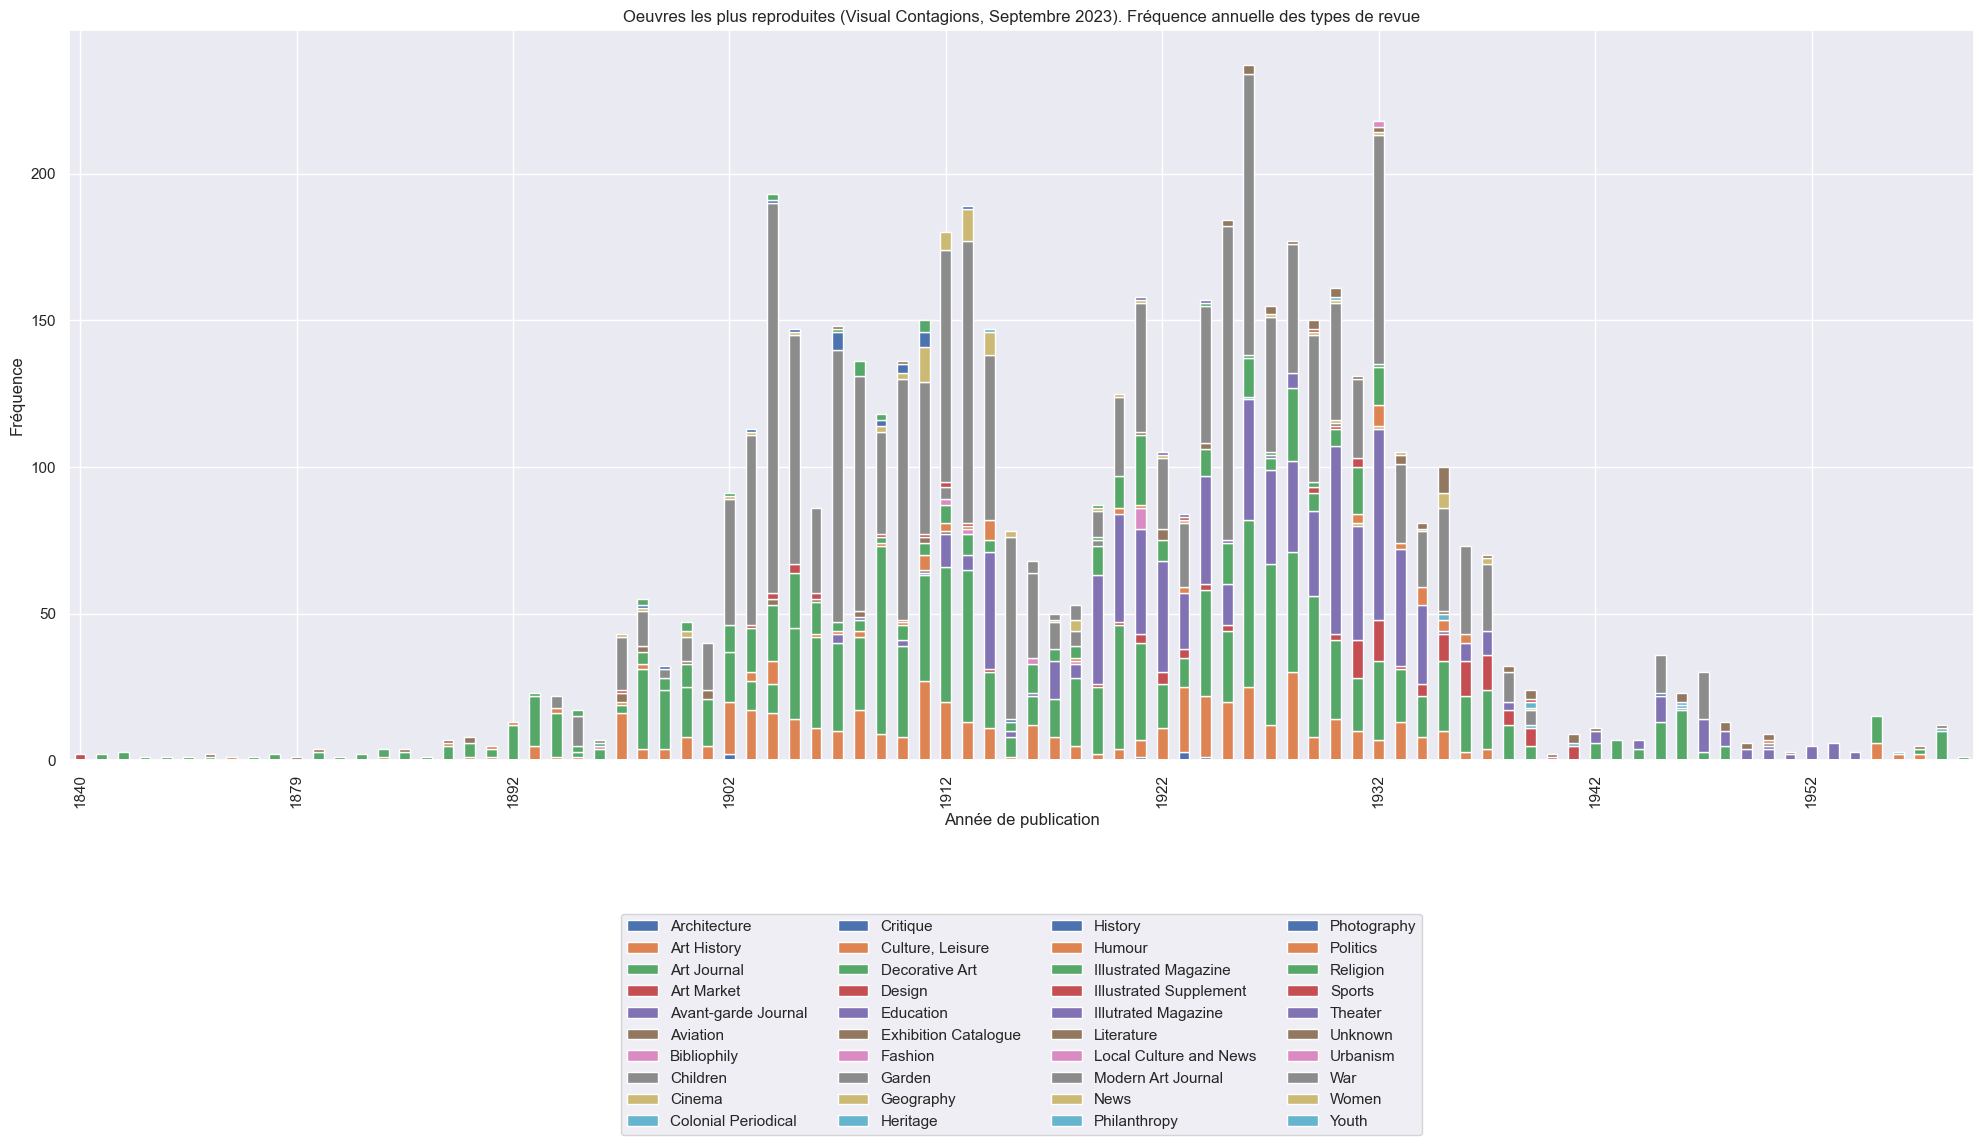

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group data by year and journal type
grouped = df.groupby([df['Date'].dt.year, 'Journal Type']).size()

# Create graph
fig, ax = plt.subplots(figsize=(20, 12))
grouped.unstack().plot(kind='bar', stacked=True, ax=ax)

# Set ax labels
ax.set_xlabel('Année de publication')
ax.set_ylabel('Fréquence')
ax.set_title('Oeuvres les plus reproduites (Visual Contagions, Septembre 2023). Fréquence annuelle des types de revue')

# Configuration of ax graduation
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Display Legend under the graph, in 4 columns
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

# Ajust margins
plt.tight_layout()

# Display graph
plt.savefig("type_by_year.png", dpi=300)
plt.show()

Modern Art Journal     1938
Art Journal            1270
Avant-garde Journal     744
Art History             504
Decorative Art          307
Art Market              103
News                     73
Unknown                  64
Culture, Leisure         62
Religion                 24
Name: Journal Type, dtype: int64


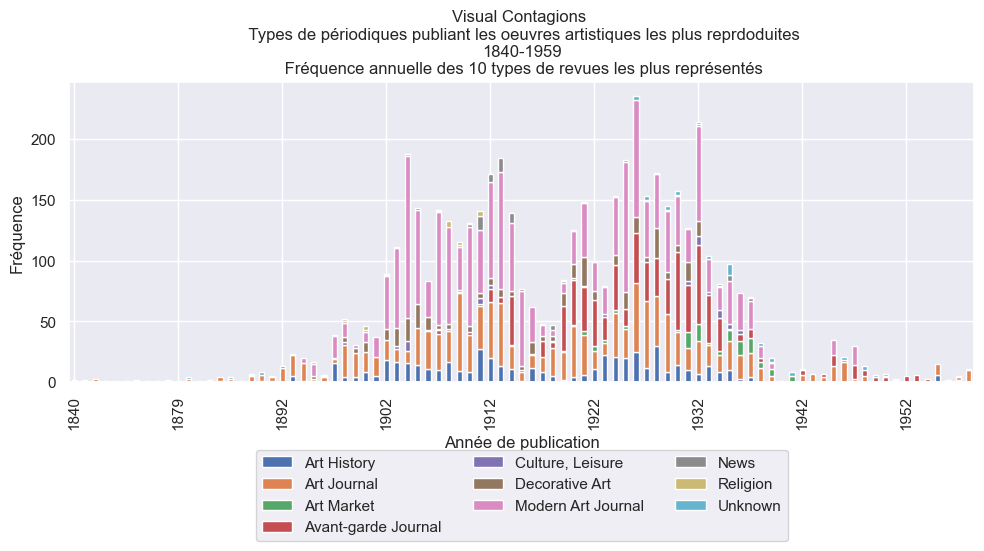

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count occurences of journal types
type_counts = df['Journal Type'].value_counts()

# the 10 most represented types 
top_10_types = type_counts.head(10)

print(top_10_types)

# Only the 10 most represented types
filtered_df = df[df['Journal Type'].isin(top_10_types.index)]


# Group data by year and journal type
grouped = filtered_df.groupby([df['Date'].dt.year, 'Journal Type']).size()



# Create the graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped.unstack().plot(kind='bar', stacked=True, ax=ax)

# Sex ax labels and title
ax.set_xlabel('Année de publication')
ax.set_ylabel('Fréquence')

ax.set_title(
    "Visual Contagions \n Types de périodiques publiant les oeuvres artistiques les plus reprdoduites\n"
    +str(min(df["Date"].dt.year))
    +"-"
    +str(max(df["Date"].dt.year))
    +'\n Fréquence annuelle des 10 types de revues les plus représentés')


# x Ax Graduation
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Display legend under the chart in 3 columns
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Ajust margins
plt.tight_layout()

# Display graph
plt.savefig("periodic_the_most_reproduced.png", dpi=300)
plt.show()


### 20 last journals - searching for a social diffusion

In [46]:
# Count occurences of journal types
type_counts = df['Journal Type'].value_counts()

# the 20 last represented types 
last_20_types = type_counts.tail(20)

print(last_20_types)

Literature                7
Garden                    6
Design                    6
Fashion                   4
Theater                   4
Heritage                  3
Sports                    3
Local Culture and News    2
Urbanism                  2
Colonial Periodical       2
Cinema                    2
Illutrated Magazine       1
Children                  1
Geography                 1
Youth                     1
Politics                  1
Critique                  1
Women                     1
Aviation                  1
History                   1
Name: Journal Type, dtype: int64


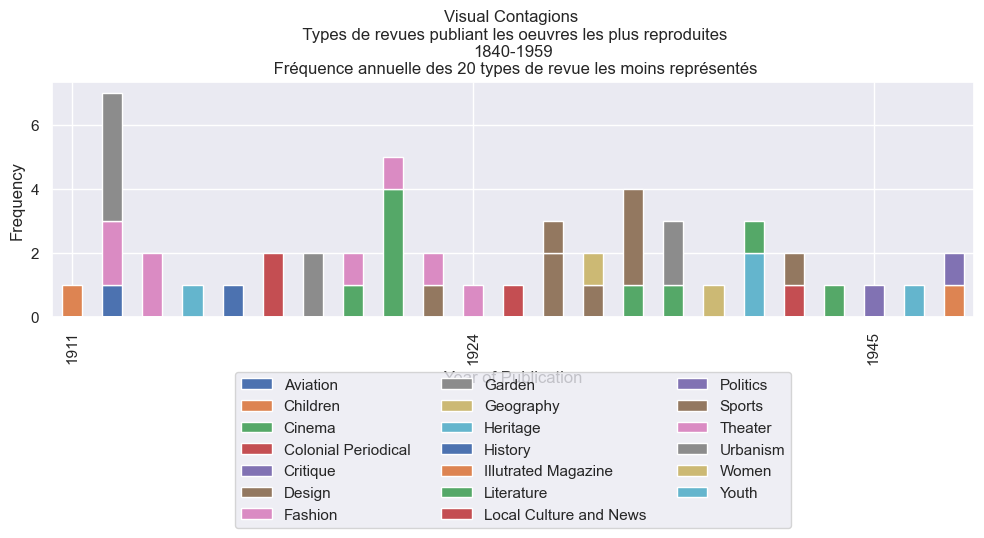

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Only the 10 most represented types
filtered_df = df[df['Journal Type'].isin(last_20_types.index)]


# Group data by year and journal type
grouped = filtered_df.groupby([df['Date'].dt.year, 'Journal Type']).size()



# Create the graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped.unstack().plot(kind='bar', stacked=True, ax=ax)

# Sex ax labels and title
ax.set_xlabel('Year of Publication')
ax.set_ylabel('Frequency')

ax.set_title(
    "Visual Contagions \n Types de revues publiant les oeuvres les plus reproduites\n"
    +str(min(df["Date"].dt.year))
    +"-"
    +str(max(df["Date"].dt.year))
    +'\n Fréquence annuelle des 20 types de revue les moins représentés')


# x Ax Graduation
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Display legend under the chart in 3 columns
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Ajust margins
plt.tight_layout()

# Display graph
plt.show()


## Countries

In [48]:
countries = df['Country'].value_counts()


In [49]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [50]:
#create the wordcloud object
nb = len(df["manifest_url"])
wordcloud = WordCloud(background_color="white", 
                      mask = mask, collocations=True).generate_from_frequencies(countries)


fig = plt.figure()

plt.title("Pays de Circulation\n " + "(" +str(nb) + ' images)')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#fig.savefig('Wordcloud.png', dpi = 200)

# What images, in what numbers?

## Top images, ordered according to highest number of circulation countries

We want to display the images that have circulated the most 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 0 to 5489
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   numero_cluster  2332 non-null   float64       
 1   manifest_url    5255 non-null   object        
 2   canvas_number   5214 non-null   float64       
 3   image_url       5255 non-null   object        
 4   City            5255 non-null   object        
 5   Country         5255 non-null   object        
 6   Title           5255 non-null   object        
 7   wkt             5255 non-null   object        
 8   Date            5255 non-null   datetime64[ns]
 9   Journal Type    5255 non-null   object        
 10  notice          0 non-null      float64       
 11  group_name      2332 non-null   object        
 12  group_tags      1562 non-null   object        
 13  Artist          2332 non-null   object        
 14  Artwork Title   2329 non-null   object        
 15  Artw

In [52]:
works_by_internationality = df.groupby('group_name')['Country'].nunique().reset_index()

In [53]:
works_by_internationality = df.groupby('group_name').agg({'Country': 'nunique', 'City': 'nunique', 'image_url': 'nunique'}).reset_index()

works_by_internationality.columns = ['Work', 'Countries', 'Cities', 'Frequency']

In [54]:
# Sort the DataFrame by 'Countries' and 'Cities' in descending order
works_by_internationality = works_by_internationality.sort_values(by=['Countries', 'Cities', 'Frequency'], ascending=[False, False, False])

# Reset the index after sorting
works_by_internationality = works_by_internationality.reset_index(drop=True)


In [55]:
works_by_internationality.head(10)

Work  Countries  Cities  \
0       Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
1        Millet, L'Angelus, 1857-1859, musée d'Orsay          6      10   
2          Dürer, Le Chevalier, la Mort et le Diable          6       7   
3         Dürer, Autoportrait aux gants, 1498, Prado          6       7   
4           Rembrandt, La Petite tombe (vente), 1652          6       7   
5              Rembrandt, Le Docteur Fautrieus, 1652          5       8   
6          Fra Angelico, Annonciation, 1430 (divers)          5       7   
7                          Dürer, Melencolia I, 1514          5       7   
8      Mondrian, (generic neoplasticist square work)          5       6   
9  Van Eyck, Vierge au Chancelier Rolin, musée du...          5       6   

   Frequency  
0         88  
1         20  
2         23  
3         14  
4         11  
5         16  
6         18  
7         17  
8         41  
9         17

We then add df["image_url"] to the dataframe works, with df["group_name"] as corresponding key. 

In [56]:
works_by_internationality = works_by_internationality.merge(df[['group_name', 'image_url']], left_on='Work', right_on='group_name', how='left')

In [57]:
works_by_internationality

Work  Countries  Cities  \
0        Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
1        Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
2        Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
3        Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
4        Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
...                                               ...        ...     ...   
2327  Seligmann, abstraction géométrique, before 1932          1       1   
2328                   Taeuber-Arp, Composition, 1931          1       1   
2329                   Taeuber-Arp, Composition, 1931          1       1   
2330                      Feininger, Cathédrale, 1918          1       1   
2331             Léger, Composition avec fleurs, 1927          1       1   

      Frequency                                       group_name  \
0            88     Da Vinci, Mona Lisa, 1503, reinterpretations   
1            88     Da Vinci, Mona Lisa, 1503, reinterpretations   
2            88     Da Vinci, Mona Lisa, 1503, reinterpretations   
3            88     Da Vinci, Mona Lisa, 1503, reinterpretations   
4            88     Da Vinci, Mona Lisa, 1503, reinterpretations   
...         ...                                              ...   
2327          2  Seligmann, abstraction géométrique, before 1932   
2328          2                   Taeuber-Arp, Composition, 1931   
2329          2                   Taeuber-Arp, Composition, 1931   
2330          1                      Feininger, Cathédrale, 1918   
2331          1             Léger, Composition avec fleurs, 1927   

                                              image_url  
0     https://gallica.bnf.fr/iiif/ark:/12148/bpt6k63...  
1     https://digitale-sammlungen.ulb.uni-bonn.de/i3...  
2     https://digitale-sammlungen.ulb.uni-bonn.de/i3...  
3     https://iiif.unige.ch/iiif/2/visualcontagions/...  
4     https://digitale-sammlungen.ulb.uni-bonn.de/i3...  
...                                                 ...  
2327  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...  
2328  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...  
2329  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...  
2330  https://digi.ub.uni-heidelberg.de/iiif/2/schre...  
2331  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...  

[2332 rows x 6 columns]

In [58]:
works_by_internationality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2331
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Work        2332 non-null   object
 1   Countries   2332 non-null   int64 
 2   Cities      2332 non-null   int64 
 3   Frequency   2332 non-null   int64 
 4   group_name  2332 non-null   object
 5   image_url   2332 non-null   object
dtypes: int64(3), object(3)
memory usage: 127.5+ KB


In [59]:
works_by_internationality.head()

Work  Countries  Cities  Frequency  \
0  Da Vinci, Mona Lisa, 1503, reinterpretations         10      31         88   
1  Da Vinci, Mona Lisa, 1503, reinterpretations         10      31         88   
2  Da Vinci, Mona Lisa, 1503, reinterpretations         10      31         88   
3  Da Vinci, Mona Lisa, 1503, reinterpretations         10      31         88   
4  Da Vinci, Mona Lisa, 1503, reinterpretations         10      31         88   

                                     group_name  \
0  Da Vinci, Mona Lisa, 1503, reinterpretations   
1  Da Vinci, Mona Lisa, 1503, reinterpretations   
2  Da Vinci, Mona Lisa, 1503, reinterpretations   
3  Da Vinci, Mona Lisa, 1503, reinterpretations   
4  Da Vinci, Mona Lisa, 1503, reinterpretations   

                                           image_url  
0  https://gallica.bnf.fr/iiif/ark:/12148/bpt6k63...  
1  https://digitale-sammlungen.ulb.uni-bonn.de/i3...  
2  https://digitale-sammlungen.ulb.uni-bonn.de/i3...  
3  https://iiif.unige.ch/iiif/2/visualcontagions/...  
4  https://digitale-sammlungen.ulb.uni-bonn.de/i3...

In [60]:
#and drop duplicates
works_by_internationality = works_by_internationality.drop_duplicates(subset=["Work", "Countries", "Cities"])

In [61]:
works_by_internationality.head(20) #we thus get for each work one url to get its equivalent .JPG

Work  Countries  Cities  \
0         Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
88         Millet, L'Angelus, 1857-1859, musée d'Orsay          6      10   
108          Dürer, Le Chevalier, la Mort et le Diable          6       7   
131         Dürer, Autoportrait aux gants, 1498, Prado          6       7   
145           Rembrandt, La Petite tombe (vente), 1652          6       7   
156              Rembrandt, Le Docteur Fautrieus, 1652          5       8   
172          Fra Angelico, Annonciation, 1430 (divers)          5       7   
190                          Dürer, Melencolia I, 1514          5       7   
207      Mondrian, (generic neoplasticist square work)          5       6   
248  Van Eyck, Vierge au Chancelier Rolin, musée du...          5       6   
265                              Monet, Déjeuner, 1868          5       6   
280  Fra Angelico, Annunciations (columns), c. 1430...          5       6   
294              Raphael, l'Ecole d'Athènes, 1508-1512          5       6   
302        Botticelli, Spring, 1477-1482, with details          5       5   
319  Corot, Tivoli - les jardins de la Villa d'Este...          5       5   
334  Cézanne, Portrait (coll. Pellerin) / copie du ...          5       5   
349                                    Vermeer, Ruelle          5       5   
363                         Clouet, Marie Stuart, 1558          5       5   
374                                     Meryon, Stryge          5       5   
385                            Rousseau, La Noce, 1905          5       5   

     Frequency                                         group_name  \
0           88       Da Vinci, Mona Lisa, 1503, reinterpretations   
88          20        Millet, L'Angelus, 1857-1859, musée d'Orsay   
108         23          Dürer, Le Chevalier, la Mort et le Diable   
131         14         Dürer, Autoportrait aux gants, 1498, Prado   
145         11           Rembrandt, La Petite tombe (vente), 1652   
156         16              Rembrandt, Le Docteur Fautrieus, 1652   
172         18          Fra Angelico, Annonciation, 1430 (divers)   
190         17                          Dürer, Melencolia I, 1514   
207         41      Mondrian, (generic neoplasticist square work)   
248         17  Van Eyck, Vierge au Chancelier Rolin, musée du...   
265         15                              Monet, Déjeuner, 1868   
280         14  Fra Angelico, Annunciations (columns), c. 1430...   
294          8              Raphael, l'Ecole d'Athènes, 1508-1512   
302         17        Botticelli, Spring, 1477-1482, with details   
319         15  Corot, Tivoli - les jardins de la Villa d'Este...   
334         15  Cézanne, Portrait (coll. Pellerin) / copie du ...   
349         14                                    Vermeer, Ruelle   
363         11                         Clouet, Marie Stuart, 1558   
374         11                                     Meryon, Stryge   
385         10                            Rousseau, La Noce, 1905   

                                             image_url  
0    https://gallica.bnf.fr/iiif/ark:/12148/bpt6k63...  
88   https://digi.ub.uni-heidelberg.de/iiif/2/chris...  
108  https://digi.ub.uni-heidelberg.de/iiif/2/wk194...  
131  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  
145  https://digi.ub.uni-heidelberg.de/iiif/2/mgvk1...  
156  https://digi.ub.uni-heidelberg.de/iiif/2/jahrb...  
172  https://digi.ub.uni-heidelberg.de/iiif/2/dessi...  
190  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  
207  https://digi.ub.uni-heidelberg.de/iiif/2/neue_...  
248  https://digi.ub.uni-heidelberg.de/iiif/2/mgvk1...  
265  https://digi.ub.uni-heidelberg.de/iiif/2/dkd19...  
280  https://digi.ub.uni-heidelberg.de/iiif/2/dessi...  
294  https://digi.ub.uni-heidelberg.de/iiif/2/kunst...  
302  https://digi.ub.uni-heidelberg.de/iiif/2/dkd19...  
319  https://digi.ub.uni-heidelberg.de/iiif/2/wk193...  
334  https://digi.ub.uni-heidelberg.de/iiif/2/dkd19...  
349  https://

## Top30 images, according to their internationality

In [62]:
Top30works = works_by_internationality.head(30)

In [63]:
Top30works

Work  Countries  Cities  \
0         Da Vinci, Mona Lisa, 1503, reinterpretations         10      31   
88         Millet, L'Angelus, 1857-1859, musée d'Orsay          6      10   
108          Dürer, Le Chevalier, la Mort et le Diable          6       7   
131         Dürer, Autoportrait aux gants, 1498, Prado          6       7   
145           Rembrandt, La Petite tombe (vente), 1652          6       7   
156              Rembrandt, Le Docteur Fautrieus, 1652          5       8   
172          Fra Angelico, Annonciation, 1430 (divers)          5       7   
190                          Dürer, Melencolia I, 1514          5       7   
207      Mondrian, (generic neoplasticist square work)          5       6   
248  Van Eyck, Vierge au Chancelier Rolin, musée du...          5       6   
265                              Monet, Déjeuner, 1868          5       6   
280  Fra Angelico, Annunciations (columns), c. 1430...          5       6   
294              Raphael, l'Ecole d'Athènes, 1508-1512          5       6   
302        Botticelli, Spring, 1477-1482, with details          5       5   
319  Corot, Tivoli - les jardins de la Villa d'Este...          5       5   
334  Cézanne, Portrait (coll. Pellerin) / copie du ...          5       5   
349                                    Vermeer, Ruelle          5       5   
363                         Clouet, Marie Stuart, 1558          5       5   
374                                     Meryon, Stryge          5       5   
385                            Rousseau, La Noce, 1905          5       5   
395                         Dürer, Nemesis,  14991501          5       5   
404                   Archipenko, Torso, many, c. 1919          5       5   
411  Puvis de Chavannes, Sainte Geneviève en prière...          5       5   
417               Ignacio Zuloaga, un Picador de Braüs          5       5   
422                       Velasquez, Las Meninas, 1656          5       5   
427        Manet, L'Exécution de Maximilien, 1868-1869          4       8   
444          Dürer, Saint Jérôme dans sa cellule, 1514          4       6   
464                Dürer, Hieronymus Holzschuher, 1526          4       6   
476  Liebermann, Flachsscheuer in Laren, 1887, Alte...          4       6   
488  Tatlin, Monument à la Troisième-Internationale...          4       6   

     Frequency                                         group_name  \
0           88       Da Vinci, Mona Lisa, 1503, reinterpretations   
88          20        Millet, L'Angelus, 1857-1859, musée d'Orsay   
108         23          Dürer, Le Chevalier, la Mort et le Diable   
131         14         Dürer, Autoportrait aux gants, 1498, Prado   
145         11           Rembrandt, La Petite tombe (vente), 1652   
156         16              Rembrandt, Le Docteur Fautrieus, 1652   
172         18          Fra Angelico, Annonciation, 1430 (divers)   
190         17                          Dürer, Melencolia I, 1514   
207         41      Mondrian, (generic neoplasticist square work)   
248         17  Van Eyck, Vierge au Chancelier Rolin, musée du...   
265         15                              Monet, Déjeuner, 1868   
280         14  Fra Angelico, Annunciations (columns), c. 1430...   
294          8              Raphael, l'Ecole d'Athènes, 1508-1512   
302         17        Botticelli, Spring, 1477-1482, with details   
319         15  Corot, Tivoli - les jardins de la Villa d'Este...   
334         15  Cézanne, Portrait (coll. Pellerin) / copie du ...   
349         14                                    Vermeer, Ruelle   
363         11                         Clouet, Marie Stuart, 1558   
374         11                                     Meryon, Stryge   
385         10                            Rousseau, La Noce, 1905   
395          9                         Dürer, Nemesis,  14991501   
404          7                   Archipenko, Torso, many, c. 1919   
411          6  Puvis de Chavannes, Sainte Geneviève en prière...   
417   

## Display the top 50 images 

In [64]:
os.listdir()

['Wordcloud_Journals_Types_frequencies.png',
 '.DS_Store',
 'artists-enriched.csv',
 'Explore_ArtWorks_Printed_Circulation_Analysis - FR-1.ipynb',
 'artists.csv',
 '1_Visual_Contagion_corpus_Stat_cartographie_10_fev2022.ipynb',
 '5-individual-artworks.csv',
 '.ipynb_checkpoints',
 'periodic_the_most_reproduced.png',
 'type_by_year.png']

In [65]:
from IPython.display import HTML, display

# Define a function to generate the HTML markup for an image with title and fixed height
def display_image_with_title_and_height(url, title, Countries, Cities, width="90px", 
                                        fixed_height="60px"):  # Adjust fixed_height here
    # Generate the HTML markup with title and fixed height
    return f'<div style="width:{width}; height:{fixed_height}; display:inline-block; text-align:center;">' \
           f'<img src="{url}" width="{width}" height="{fixed_height}"/><br/>{title} - {Countries} pays, {Cities} villes</div>'

# Create a list of images with titles and fixed heights from the columns
image_html_list = [display_image_with_title_and_height(url, title, freq, cities) for url, title, freq, cities in zip(Top30works["image_url"], Top30works["Work"], Top30works["Countries"], Top30works["Cities"])]

# Number of columns
columns = 10

# Image width, according to the number of columns
image_width = f"{100 / columns}%"

# Create image groups for each column
image_html_groups = [image_html_list[i:i + columns] for i in range(0, len(image_html_list), columns)]

# Display as a grid
for group in image_html_groups:
    display(HTML(''.join(group)))


# Artists

## list of unique artists

In [66]:
Artists_by_internationality = df.groupby('Artist').agg({'Country': 'nunique', 'City': 'nunique', 'image_url': 'nunique'}).reset_index()
Artists_by_internationality.columns = ['Artist', 'Countries', 'Cities', 'Frequency']

# Sort the DataFrame by 'Countries' and 'Cities' in descending order

Artists_by_internationality = Artists_by_internationality.sort_values(by=['Countries', 'Cities'], ascending=[False, False])
Artists_by_internationality.reset_index()

# suppress column 1
Artists_by_internationality 


Artist  Countries  Cities  Frequency
32      Da Vinci         11      33        101
43         Dürer         10      18        188
113      Picasso          9      14        128
120    Rembrandt          8      14         37
93         Manet          8      12        149
..           ...        ...     ...        ...
77   La Fresnaye          1       1          2
100    Metzinger          1       1          2
104         Miró          1       1          2
133    Seligmann          1       1          2
140  Taeuber-Arp          1       1          2

[161 rows x 4 columns]

## Enriching Artists' information

In [67]:
# Export DataFrame to CSV
Artists_by_internationality.to_csv('artists.csv', index=False)

In [68]:
# All names have been reconciled with Wikidata (through OpenRefine)
# New columns added : First name, birth date, death date, birth place, death place

In [69]:
# Reimportation

In [70]:
path2 = "artists-enriched.csv"

In [71]:
df2 = pd.read_csv(path2, sep=";") 

In [72]:
df2.head()

Name                Artist   place of birth  \
0      Edmond Aman-Jean             Aman Jean  Chevry-Cossigny   
1  Antonello da Messina  Antonello da Messina          Messina   
2  Alexander Archipenko            Archipenko             Kyiv   
3              Jean Arp                   Arp       Strasbourg   
4            Léon Bakst                 Bakst           Hrodna   

    place of death sex or gender         date of birth         date of death  
0            Paris          male  1858-11-13T00:00:00Z  1936-01-25T00:00:00Z  
1          Messina          male  1430-01-01T00:00:00Z  1479-01-01T00:00:00Z  
2    New York City          male  1887-05-30T00:00:00Z  1964-02-25T00:00:00Z  
3            Basel          male  1886-09-16T00:00:00Z  1966-06-07T00:00:00Z  
4  Rueil-Malmaison          male  1866-01-27T00:00:00Z  1924-12-27T00:00:00Z

In [73]:
merged_df = Artists_by_internationality.merge(df2, on="Artist", how="left").drop_duplicates()


In [74]:
Artists_by_internationality = merged_df

In [75]:
new_order = ['Artist', 'Name', 'Countries', 'Cities', 'Frequency',  'sex or gender', 'place of birth', 'place of death','date of birth', 'date of death']
Artists_by_internationality = Artists_by_internationality[new_order]

In [76]:
Artists_by_internationality


Artist                  Name  Countries  Cities  Frequency  \
0       Da Vinci     Leonardo da Vinci         11      33        101   
1          Dürer        Albrecht Dürer         10      18        188   
2        Picasso         Pablo Picasso          9      14        128   
3      Rembrandt             Rembrandt          8      14         37   
4          Manet         Édouard Manet          8      12        149   
..           ...                   ...        ...     ...        ...   
156  La Fresnaye  Roger de La Fresnaye          1       1          2   
157    Metzinger        Jean Metzinger          1       1          2   
158         Miró             Joan Miró          1       1          2   
159    Seligmann        Kurt Seligmann          1       1          2   
160  Taeuber-Arp    Sophie Taeuber-Arp          1       1          2   

    sex or gender                       place of birth  \
0            male                             Anchiano   
1            male                            Nuremberg   
2            male                               Málaga   
3            male                               Leiden   
4            male  former 10th arrondissement of Paris   
..            ...                                  ...   
156          male                              Le Mans   
157          male                               Nantes   
158          male                            Barcelona   
159          male                                Basel   
160        female                                Davos   

                       place of death         date of birth  \
0                             Amboise  1452-04-15T00:00:00Z   
1                           Nuremberg  1471-05-21T00:00:00Z   
2    Mas Notre-Dame-de-Vie de Mougins  1881-10-25T00:00:00Z   
3                           Amsterdam  1606-07-15T00:00:00Z   
4         8th arrondissement of Paris  1832-01-23T00:00:00Z   
..                                ...                   ...   
156                            Grasse  1885-07-11T00:00:00Z   
157                             Paris  1883-06-24T00:00:00Z   
158                             Palma  1893-04-20T00:00:00Z   
159                     New York City  1900-07-20T00:00:00Z   
160                            Zürich  1889-01-19T00:00:00Z   

            date of death  
0    1519-05-02T00:00:00Z  
1    1528-04-06T00:00:00Z  
2    1973-04-08T00:00:00Z  
3    1669-10-04T00:00:00Z  
4    1883-04-30T00:00:00Z  
..                    ...  
156  1925-11-27T00:00:00Z  
157  1956-11-03T00:00:00Z  
158  1983-12-25T00:00:00Z  
159  1962-01-02T00:00:00Z  
160  1943-01-13T00:00:00Z  

[161 rows x 10 columns]

## Artists most represented

### Cleaning Birth and Death Years

In [77]:
Artists_by_internationality['date of birth'] = Artists_by_internationality['date of birth'].astype(str).str[:4]

In [78]:
Artists_by_internationality['date of death'] = Artists_by_internationality['date of death'].astype(str).str[:4]

In [79]:
Artists_by_internationality.dropna(subset=['Artist'], inplace=True)

In [80]:
Artists_by_internationality.head(10)

Artist                  Name  Countries  Cities  Frequency  \
0    Da Vinci     Leonardo da Vinci         11      33        101   
1       Dürer        Albrecht Dürer         10      18        188   
2     Picasso         Pablo Picasso          9      14        128   
3   Rembrandt             Rembrandt          8      14         37   
4       Manet         Édouard Manet          8      12        149   
5   Segantini    Giovanni Segantini          7      11         31   
6  Archipenko  Alexander Archipenko          7       9         17   
7    Van Eyck          Jan van Eyck          7       9         33   
8     Cézanne          Paul Cézanne          7       8         70   
9      Millet  Jean-Baptiste Millet          6      10         20   

  sex or gender                       place of birth  \
0          male                             Anchiano   
1          male                            Nuremberg   
2          male                               Málaga   
3          male                               Leiden   
4          male  former 10th arrondissement of Paris   
5          male                                 Arco   
6          male                                 Kyiv   
7          male                              Maaseik   
8          male                      Aix-en-Provence   
9          male                      Gréville-Hague    

                     place of death date of birth date of death  
0                           Amboise          1452          1519  
1                         Nuremberg          1471          1528  
2  Mas Notre-Dame-de-Vie de Mougins          1881          1973  
3                         Amsterdam          1606          1669  
4       8th arrondissement of Paris          1832          1883  
5                        Pontresina          1858          1899  
6                     New York City          1887          1964  
7                            Bruges          1390          1441  
8                   Aix-en-Provence          1839          1906  
9                   Auvers-sur-Oise          1830          1906

### Complexifying artists' score

Let us build a "popularity score" That could be the sum of 2*countries + 1* cities + 10% frequency.

In [81]:
Artists_by_internationality["Score"] = 2 * Artists_by_internationality["Countries"] + Artists_by_internationality["Cities"] + 0.2 * Artists_by_internationality["Frequency"]
Artists_by_internationality["Score"] = Artists_by_internationality["Score"].astype(int)


In [82]:
Artists_by_internationality.head(20)

Artist                       Name  Countries  Cities  \
0             Da Vinci          Leonardo da Vinci         11      33   
1                Dürer             Albrecht Dürer         10      18   
2              Picasso              Pablo Picasso          9      14   
3            Rembrandt                  Rembrandt          8      14   
4                Manet              Édouard Manet          8      12   
5            Segantini         Giovanni Segantini          7      11   
6           Archipenko       Alexander Archipenko          7       9   
7             Van Eyck               Jan van Eyck          7       9   
8              Cézanne               Paul Cézanne          7       8   
9               Millet       Jean-Baptiste Millet          6      10   
10            Rousseau             Henri Rousseau          6       9   
11               Monet               Claude Monet          6       8   
12            Van Gogh           Vincent van Gogh          6       8   
13            Brueghel                        NaN          6       6   
14  Puvis de Chavannes  Pierre Puvis de Chavannes          6       6   
15              Seurat             Georges Seurat          6       6   
16             Vermeer           Johannes Vermeer          6       6   
17        Fra Angelico               Fra Angelico          5       8   
18             Matisse              Henri Matisse          5       8   
19          Botticelli          Sandro Botticelli          5       7   

    Frequency sex or gender                       place of birth  \
0         101          male                             Anchiano   
1         188          male                            Nuremberg   
2         128          male                               Málaga   
3          37          male                               Leiden   
4         149          male  former 10th arrondissement of Paris   
5          31          male                                 Arco   
6          17          male                                 Kyiv   
7          33          male                              Maaseik   
8          70          male                      Aix-en-Provence   
9          20          male                      Gréville-Hague    
10         58          male                                Laval   
11         67          male                                Paris   
12         38          male                              Zundert   
13         16           NaN                                  NaN   
14         13          male                                 Lyon   
15         64          male                                Paris   
16         43          male                                Delft   
17         24          male                              Vicchio   
18         56          male                  Le Cateau-Cambrésis   
19         36          male                             Florence   

                      place of death date of birth date of death  Score  
0                            Amboise          1452          1519     75  
1                          Nuremberg          1471          1528     75  
2   Mas Notre-Dame-de-Vie de Mougins          1881          1973     57  
3                          Amsterdam          1606          1669     37  
4        8th arrondissement of Paris          1832          1883     57  
5                         Pontresina          1858          1899     31  
6                      New York City          1887          1964     26  
7                             Bruges          1390          1441     29  
8                    Aix-en-Provence          1839          1906     36  
9                    Auvers-sur-Oise          1830          1906     26  
10                             Paris          1844          1910     32  
11                           Giverny          1840          1926     33  
12                   Auvers-sur-Oise          1853          1890     27  
13                               NaN  

### Names most represented (Cloud)

In [83]:
import numpy as np

# Replace NaN values in the 'Score' column with 0
Artists_by_internationality['Score'].fillna(0, inplace=True)

# Convert the 'Score' column to integers and create a dictionary
artist_frequency = dict(zip(Artists_by_internationality['Artist'], 
                            map(int, Artists_by_internationality['Score'])))

# Create wordcloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artist_frequency)

# Display the cloud

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des artistes les plus reproduits\n Corpus Visual Contagions, septembre 2023')
plt.show()

### Generations most represented (Artists over Birth Date)

In [84]:
Artists_by_internationality['date of birth'].sort_values()


7      1390
17     1390
86     1395
60     1400
121    1415
       ... 
134     nan
133     nan
114     nan
59      nan
80      nan
Name: date of birth, Length: 161, dtype: object

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les années de naissance en tant que chaînes de caractères
Artists_by_internationality['year_of_birth'] = Artists_by_internationality['date of birth'].str[:4]

# Regrouper les données par année de naissance et sommer les fréquences
grouped = Artists_by_internationality.groupby('year_of_birth')['Countries'].sum()

# Créer une séquence de couleurs personnalisée
colors = plt.cm.get_cmap('Set3', len(grouped))

# Créer la figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(10, 6))

# Créer le graphique en barres
ax.bar(grouped.index, grouped.values, color=colors(np.arange(len(grouped))))

# Configuration des axes et des étiquettes
ax.set_xlabel('Date of Birth')
ax.set_ylabel('Frequency')
ax.set_title("Visual Contagions \n Oeuvres les plus reproduites dans les périodiques illustrés du corpus Visual Contagions \n Par année de naissance de l'artiste, en nombre d'oeuvres")

# Configurer les graduations de l'axe des x
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Ajouter une légende avec les années de naissance
ax.legend(labels=grouped.index, title='Année de naissance', loc='upper right')

# Ajuster les marges
plt.tight_layout()

# Afficher le graphique
plt.show()


### Artists Over Birth Date, by number of countries

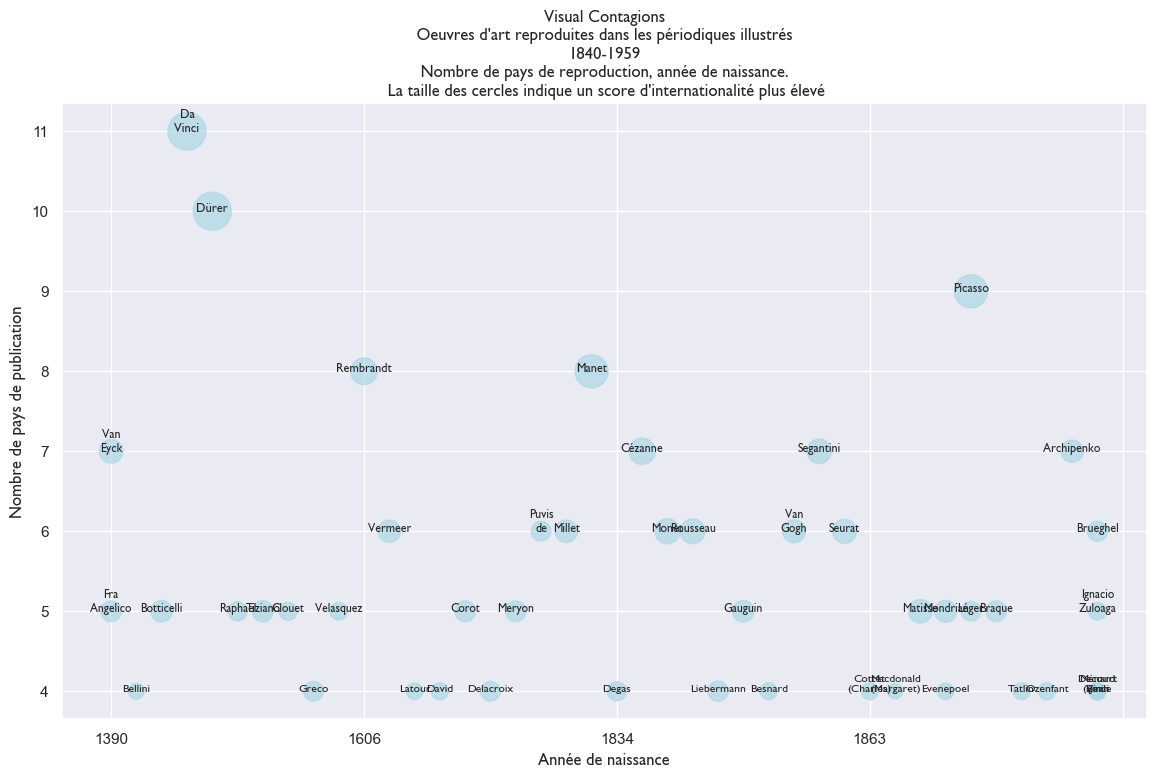

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter missing values in the "date of birth" column
filtered_df = Artists_by_internationality.dropna(subset=['date of birth'])

# Filter data where "Countries" is greater than 3
filtered_df = filtered_df[filtered_df['Countries'] > 3]

# Sort the DataFrame in ascending order of the "date of birth" column
filtered_df = filtered_df.sort_values('date of birth')

# Convert the 'Score' column to integers after handling missing or non-integer values
filtered_df['Score'] = filtered_df['Score'].fillna(0).astype(int)

# Create the figure with a custom size
fig, ax = plt.subplots(figsize=(14, 8))

# Configure x-axis ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Create the scatter plot with custom point sizes based on 'Score'
# Change the color of the points to light blue
plt.scatter(filtered_df['date of birth'], 
            filtered_df['Countries'], 
            s=filtered_df['Score'] * 10, 
            alpha=0.7, c='lightblue')

# Initialize variables to keep track of label positions
labels_above = []
labels_below = []

# Add annotations for each point with variable font size
for i, row in filtered_df.iterrows():
    #artist = row['Artist'].split()[0]+"\n"+row['Artist'].split()[1]  # Get the first term in the "Artist" column
    # Split the full name into two parts (first name and last name)
    name_parts = row['Artist'].split()

        # Check if there are two parts (first name and last name)
    if len(name_parts) >= 2:
        artist = f"{name_parts[0]}\n{name_parts[1]}"
    else:
        artist = name_parts[0]
  
    date_of_birth = row['date of birth']
    frequency = row['Countries']
    # Update font size based on 'Countries'
    fontsize = 8 + frequency / 10
    # Set the font name to Gill Sans
    plt.annotate(artist, (date_of_birth, frequency), fontsize=fontsize, ha='center', fontname='Gill Sans')
    
    # Place labels above the points for frequencies greater than 3
    if frequency > 3:
        labels_above.append(artist)
    else:
        labels_below.append(artist)

# Configure axes and labels
plt.xlabel('Année de naissance', fontname='Gill Sans')
plt.ylabel('Nombre de pays de publication', fontname='Gill Sans')
plt.title('Visual Contagions\n Oeuvres d\'art reproduites dans les périodiques illustrés \n'
          + str(int(min(df["Date"].dt.year))) + '-' + str(int(max(df["Date"].dt.year)))
          + '\n Nombre de pays de reproduction, année de naissance. \n La taille des cercles indique un score d\'internationalité plus élevé', fontname='Gill Sans')

# Modify x-axis to display every 10 values
date_of_birth_values = filtered_df['date of birth'].dropna().astype(float)
date_of_birth_values = date_of_birth_values[~np.isnan(date_of_birth_values)]
# plt.xticks(np.arange(min(date_of_birth_values), max(date_of_birth_values), 10))

# Position labels above and below the points
plt.annotate('\n'.join(labels_above), (0, 0), fontsize=8, ha='center', va='bottom', fontname='Gill Sans')
plt.annotate('\n'.join(labels_below), (0, 0), fontsize=8, ha='center', va='top', fontname='Gill Sans')

# Display the graph
plt.savefig('Artists_Scores_by_Birth-Date.png', dpi=300, bbox_inches='tight')
plt.show()


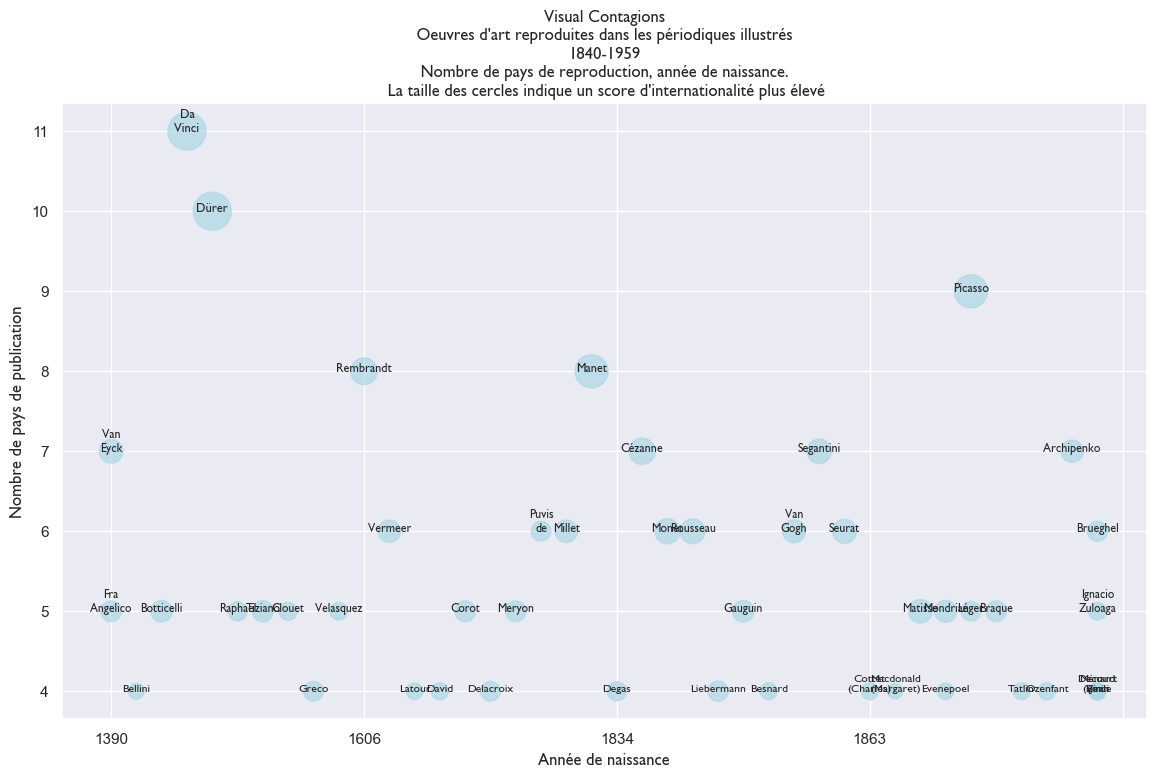

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter missing values in the "date of birth" column
filtered_df = Artists_by_internationality.dropna(subset=['date of birth'])

# Filter data where "Countries" is greater than 3
filtered_df = filtered_df[filtered_df['Countries'] > 3]

# Convert the 'Score' column to integers after handling missing or non-integer values
filtered_df['Score'] = filtered_df['Score'].fillna(0).astype(int)

# Sort the DataFrame in ascending order of the "date of birth" column
filtered_df = filtered_df.sort_values('date of birth')

# Create the figure with a custom size
fig, ax = plt.subplots(figsize=(14, 8))

# Configure x-axis ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Create the scatter plot with custom point sizes based on 'Score'
# Change the color of the points to light blue
plt.scatter(filtered_df['date of birth'], 
            filtered_df['Countries'], 
            s=filtered_df['Score'] * 10, 
            alpha=0.7, c='lightblue')

# Initialize variables to keep track of label positions
labels_above = []
labels_below = []

# Add annotations for each point with variable font size
for i, row in filtered_df.iterrows():
    #artist = row['Artist'].split()[0]+"\n"+row['Artist'].split()[1]  # Get the first term in the "Artist" column
    # Split the full name into two parts (first name and last name)
    name_parts = row['Artist'].split()

    # Check if there are two parts (first name and last name)
    if len(name_parts) >= 2:
        artist = f"{name_parts[0]}\n{name_parts[1]}"
    else:
        artist = name_parts[0]
  
    date_of_birth = row['date of birth']
    frequency = row['Countries']
    # Update font size based on 'Countries'
    fontsize = 8 + frequency / 10
    # Set the font name to Gill Sans
    plt.annotate(artist, (date_of_birth, frequency), fontsize=fontsize, ha='center', fontname='Gill Sans')
    
    # Place labels above the points for frequencies greater than 3
    if frequency > 3:
        labels_above.append(artist)
    else:
        labels_below.append(artist)

# Configure axes and labels
plt.xlabel('Année de naissance', fontname='Gill Sans')
plt.ylabel('Nombre de pays de publication', fontname='Gill Sans')
plt.title('Visual Contagions\n Oeuvres d\'art reproduites dans les périodiques illustrés \n'
          + str(int(min(df["Date"].dt.year))) + '-' + str(int(max(df["Date"].dt.year)))
          + '\n Nombre de pays de reproduction, année de naissance. \n La taille des cercles indique un score d\'internationalité plus élevé', fontname='Gill Sans')

# Modify x-axis to display every 10 values
date_of_birth_values = filtered_df['date of birth'].dropna().astype(float)
date_of_birth_values = date_of_birth_values[~np.isnan(date_of_birth_values)]
# plt.xticks(np.arange(min(date_of_birth_values), max(date_of_birth_values), 10))

# Position labels above and below the points
plt.annotate('\n'.join(labels_above), (0, 0), fontsize=8, ha='center', va='bottom', fontname='Gill Sans')
plt.annotate('\n'.join(labels_below), (0, 0), fontsize=8, ha='center', va='top', fontname='Gill Sans')

# Display the graph
plt.savefig('Artists_Scores_by_Birth-Date.png', dpi=300, bbox_inches='tight')
plt.show()


## Artists'scores over Time (A History of Tastes?)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 0 to 5489
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   numero_cluster  2332 non-null   float64       
 1   manifest_url    5255 non-null   object        
 2   canvas_number   5214 non-null   float64       
 3   image_url       5255 non-null   object        
 4   City            5255 non-null   object        
 5   Country         5255 non-null   object        
 6   Title           5255 non-null   object        
 7   wkt             5255 non-null   object        
 8   Date            5255 non-null   datetime64[ns]
 9   Journal Type    5255 non-null   object        
 10  notice          0 non-null      float64       
 11  group_name      2332 non-null   object        
 12  group_tags      1562 non-null   object        
 13  Artist          2332 non-null   object        
 14  Artwork Title   2329 non-null   object        
 15  Artw

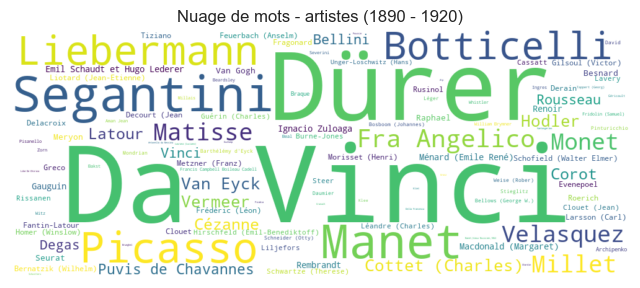

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Définir la période de dates i à f
date_i = "1890"
date_f = "1920"

# Filtrer le dataframe en fonction de la période de dates
filtered_df = df[(df['Date'] >= date_i) & (df['Date'] <= date_f)]
Artists_by_internationality = filtered_df.groupby('Artist').agg({'Country': 'nunique', 'City': 'nunique', 'image_url': 'nunique'}).reset_index()

Artists_by_internationality.columns = ['Artist', 'Countries', 'Cities', 'Frequency']
Artists_by_internationality["Score"] = 2 * Artists_by_internationality["Countries"] + Artists_by_internationality["Cities"] + 0.2 * Artists_by_internationality["Frequency"]
Artists_by_internationality["Score"] = Artists_by_internationality["Score"].astype(int)

# Calculer le nombre total d'images par artiste dans la période spécifiée
artist_frequency = dict(zip(Artists_by_internationality['Artist'], 
                            map(int, Artists_by_internationality['Score'])))

# Create Wordcloud
wordcloud = WordCloud(width=1000, height=400, background_color='white', 
                      prefer_horizontal=1, max_words=len(artist_frequency))
wordcloud.generate_from_frequencies(artist_frequency)

# Configurer la taille de la figure
fig, ax = plt.subplots(figsize=(8, 8))

# Afficher le nuage de mots sur une forme ronde
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Afficher le titre du nuage de mots
ax.set_title(f"Nuage de mots - artistes ({date_i} - {date_f})")

# Afficher le graphique
plt.show()


In [90]:
len(filtered_df)

2543

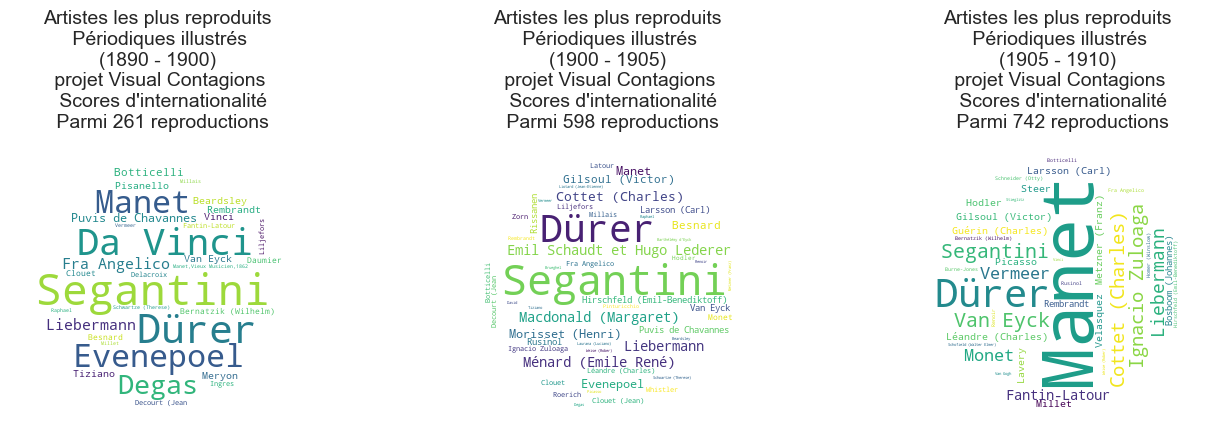

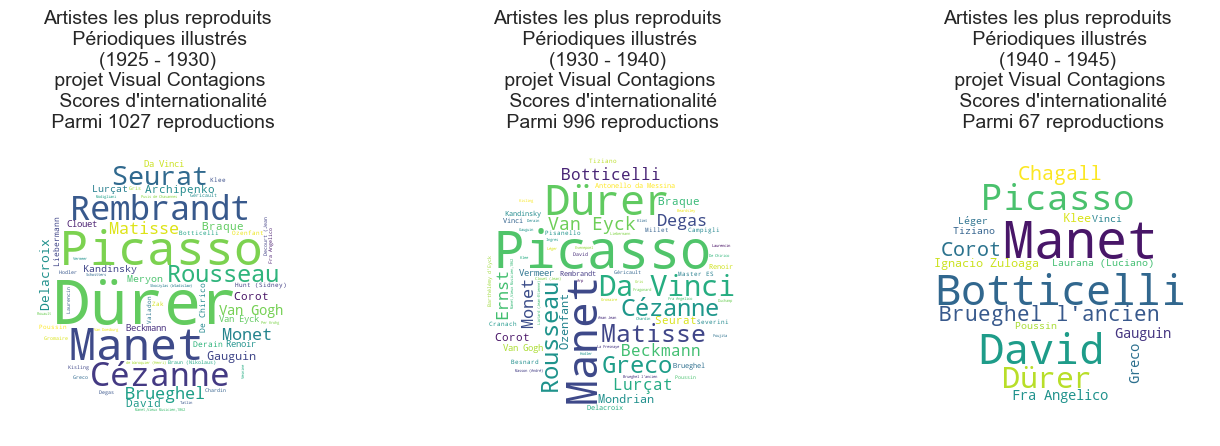

In [110]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Liste des périodes de dates
date_periods = [#("1850", "1880"), ("1880", "1890"),
                ("1890", "1900"), ("1900", "1905"),
                ("1905", "1910"), ("1910", "1915"),
                ("1915", "1918"), ("1918", "1925"),
                ("1925", "1930"), ("1930", "1940"),
                ("1940", "1945"), ("1945", "1960")]

# Définir la police souhaitée
#font_family = "Gill Sans MT"

# Déterminer le nombre de figures nécessaires
num_figures = len(date_periods) // 3 + (1 if len(date_periods) % 3 != 0 else 0)

# Parcourir les périodes de dates
for i, (date_i, date_f) in enumerate(date_periods):
    filtered_df = df[(df['Date'] >= date_i) & (df['Date'] <= date_f)]
    Artists_by_internationality = filtered_df.groupby('Artist').agg({'Country': 'nunique', 'City': 'nunique', 'image_url': 'nunique'}).reset_index()

    Artists_by_internationality.columns = ['Artist', 'Countries', 'Cities', 'Frequency']
    Artists_by_internationality["Score"] = 2 * Artists_by_internationality["Countries"] + Artists_by_internationality["Cities"] + 0.2 * Artists_by_internationality["Frequency"]
    Artists_by_internationality["Score"] = Artists_by_internationality["Score"].astype(int)

    # Calculer le nombre total d'images par artiste dans la période spécifiée
    artist_frequency = dict(zip(Artists_by_internationality['Artist'], 
                            map(int, Artists_by_internationality['Score'])))
    
    
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    # Générer le nuage de mots
    wordcloud = WordCloud(mask=mask, collocations=True,
                          width=1200, #height=800,
                          background_color='white',
                          #prefer_horizontal=1,
                          max_words=len(artist_frequency))
    wordcloud.generate_from_frequencies(artist_frequency)

    # Placer le nuage de mots dans la figure appropriée
    subplt_index = i % 3 + 1
    if i % 3 == 0:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplots_adjust(top=0.7, bottom=0.1, left=0.1, right=0.9, hspace=0.3, wspace=0.5)
    axs[subplt_index - 1].imshow(wordcloud, interpolation='bilinear')
    axs[subplt_index - 1].set_title(f"Artistes les plus reproduits \n Périodiques illustrés \n({date_i} - {date_f}) \n projet Visual Contagions \n Scores d'internationalité\n Parmi {str(len(filtered_df))} reproductions",
                                    fontsize=14)
    axs[subplt_index - 1].axis('off')

    # Enregistrer l'image avec une résolution de 300 dpi
    if subplt_index == 3 or i == len(date_periods) - 1:
        plt.savefig(f'Artists_WordCloud_{i//3+1}.png', dpi=300)
        plt.show()

# Afficher la dernière figure si elle n'a pas été affichée
if len(date_periods) % 3 != 0:
    plt.show()

## Artists' Internationality Scores

calculer un score d'internationalité pour un artiste du corpus : combien de pays en moyenne sont visités par ses oeuvres; et affiner l'évaluation pour chaque décennie. 

soit un artiste
Liste de ses oeuvres
liste des villes de passage; compte des villes de passage
liste des pays de passage; compte des pays de passage.


### Le cas Dürer/Picasso/Manet

In [ ]:
# Fill missing values in the "Artists" column with an empty string
df['Artist'].fillna('', inplace=True)

# Select rows where the "Artists" column contains "Picasso"
picasso_df = df[df['Artist'].str.contains('Manet')]

# Display the selected rows
picasso_df.head()

In [ ]:
picasso_df.describe(include='all')

In [ ]:
picasso_df["Country"].unique()

In [ ]:
len(picasso_df["Country"].unique())

In [ ]:
picasso_df["City"].unique()

In [ ]:
len(picasso_df["City"].unique())

In [ ]:
picasso_df["Work"].unique()

In [ ]:
len(picasso_df["Work"].unique())

In [ ]:
picasso_df["Journal Type"].unique()

In [ ]:
df.info()

### Comparative Scores

In [ ]:
df.info()

In [ ]:
artist_info = []
for artist in df['Artist'].unique():
    artist_df = df[df['Artist'] == artist]
    num_works = len(artist_df["Artwork Title"].unique())
    num_cities = len(artist_df["City"].unique())
    num_journals = len(artist_df["Title"].unique())
    num_countries = len(artist_df["Country"].unique())
    num_types = len(artist_df["Journal Type"].unique())
    artist_dict = {
        "Artist": artist,
        "Num Works" : num_works,
        "Num Journals": num_journals,
        "Num Types" : num_types,
        "Num Cities" : num_cities,
        "Num Countries": num_countries
    }
    artist_info.append(artist_dict)
artist_info_df = pd.DataFrame(artist_info)

In [ ]:
artists_info = pd.DataFrame(artist_info)

In [ ]:
artists_info.sort_values("Num Countries", ascending = False).head(10)

In [ ]:
len(artists_info)

## Artist's Geographies over time (change the name of the artist)

In [ ]:
artist = "Dürer"

In [ ]:


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Créer la figure et les spécifications de la grille
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

# Placer la carte sur le premier sous-graphique (ax1)
ax1 = fig.add_subplot(gs[0])

ax1.set_axis_off()

######### Placer la carte sur le premier sous-graphique (ax1)
# Code pour créer et afficher la carte...

#import geopandas as gpd
#import matplotlib.pyplot as plt

# Create a new column "geometry" with Point objects
df['geometry'] = df['wkt'].apply(lambda x: Point(float(x.split('(')[1].split()[0]),
                                                float(x.split('(')[1].split()[1][:-1])))

# Drop rows with missing or invalid geometry
df = df.dropna(subset=['geometry'])



artist_df = df[df['Artist'] == artist]

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(artist_df, geometry='geometry')

# Assign a CRS to the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming WGS84 coordinate system, adjust as needed

# Read the shapefile
basemap = gpd.read_file('C:/Users/joyeuxpr/OneDrive - unige.ch/Travail/GENEVE/VISUAL-CONTAGIONS/Python-notebooks/Basemaps/ne_110m_admin_0_countries.shp')



# Plot the basemap
basemap.plot(ax=ax1, color='lightgray')

# Plot the point data
gdf.plot(ax=ax1, marker='o', color='red', markersize=5)

# Set the title
ax1.set_title( artist + '\n Diffusion de ses oeuvres dans les périodiques illustrés\n (min. 5 pays de reproduction, ' 
             +str(min(artist_df["Date"].dt.year))
              +"-"
              +str(max(artist_df["Date"].dt.year)) +")", 
              fontsize=16, family='Gill Sans MT'
            )
sub_title = "Sources: Visual Contagions (corpus : 12,9 M images). Figure: Béatrice Joyeux-Prunel, Sept. 2023"
ax1.text(0.495, 0.98, sub_title, transform=ax1.transAxes, fontsize=10, ha='center', va='top')


######### Placer le graphique sur le deuxième sous-graphique (ax2)
# Code pour créer et afficher le graphique...
ax2 = fig.add_subplot(gs[1])

# Prétraitement des données
artist_df['Date'] = pd.to_datetime(artist_df['Date'])
artist_df = artist_df.dropna(subset=['image_url', 'Journal Type'])
artist_df['Year'] = artist_df['Date'].dt.year

# Compter le nombre d'images par année et par type de revue
image_counts = artist_df.groupby(['Year', 'Journal Type']).size().unstack()

# Tracer le graphique
image_counts.plot(ax = ax2, kind='bar', stacked=True)

# Configuration des axes et des étiquettes
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

# Ajouter une marge inférieure pour laisser de l'espace pour le titre du graphique ax2
fig.subplots_adjust(bottom=-0.05)

ax2.legend(loc = "right")

# Configuration de l'espacement entre les étiquettes d'axe x
plt.setp(ax2.get_xticklabels(), rotation=90)


# Ajuster les espacements entre les sous-graphiques
plt.subplots_adjust(top=0.9, bottom=0.1)

ax2.set_title("Nombre annuel d'images et de types de revues", loc = "center", fontsize = 12, font = "Gill")
# Ajouter le titre du graphique ax2 en haut à gauche du graphique
#ax2.text(0.05, 0.95, 'Number of Images and Journal Types per Year', transform=ax2.transAxes,
        # ha='left', va='top', fontsize=12)

path1 = artist + '_Outreach_'+str(min(artist_df["Date"].dt.year))+"-"+str(max(artist_df["Date"].dt.year))+'.png'

fig.savefig(path1, dpi=300)


# Afficher la visualisation finale
plt.show()

In [ ]:
artist_df.head()

In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import textwrap

# Count the occurrences of image_group
group_counts = artist_df['group_name'].value_counts()

# Select the top 5 most represented image_groups
top_5_groups = group_counts.head(5).index.tolist()

# Create a list to store the image URLs
top_5_images = []

# Iterate over the top 5 image_groups and retrieve the first image_url from each group
for group in top_5_groups:
    group_df = artist_df[artist_df['group_name'] == group]
    first_image_url = group_df['image_url'].iloc[0]
    top_5_images.append(first_image_url)

# Define the desired height for the images
image_height = 300

# Create a figure with a single row and multiple columns
fig, axes = plt.subplots(1, len(top_5_images), figsize=(12, image_height/100))

# Display the images from the URLs
for i, url in enumerate(top_5_images):
    # Load the image from the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    # Resize the image to the desired height while maintaining the aspect ratio
    img = img.resize((int(img.width * (image_height / img.height)), image_height))
    
    # Display the image on the corresponding axis
    axes[i].imshow(img)
    axes[i].axis('off')
    
    # Add legend with the second part of group_name after comma (wrapped to the next line)
    group_name = artist_df.loc[artist_df['image_url'] == url, 'group_name'].str.split(',', n=1).str[1].str.strip().iloc[0]
    wrapped_text = textwrap.fill(group_name, width=20)  # Adjust width as needed
    legend_width = img.width  # Set legend width to match the image width
    axes[i].text(0.5, -0.1, wrapped_text, 
                 horizontalalignment='center', verticalalignment='center', fontsize=10,
                 bbox=dict(boxstyle='square,pad=0.3', edgecolor='none', facecolor='white', alpha=0.7, pad=0.2))
    
    # Adjust the legend width based on its content
    bbox = axes[i].texts[-1].get_bbox_patch()
    bbox.set_width(legend_width)

# Adjust the spacing between the images
plt.subplots_adjust(wspace=0.05)

path2 = artist + '_top_5_images.png'
# Save the concatenated image of the 5 images
plt.savefig(path2, dpi=300)  # Replace with desired path and filename

# Display the figure
plt.show()


In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Ouvrir les images
image1 = Image.open(path1)  # Remplacez par le chemin vers votre première image
image2 = Image.open(path2)  # Remplacez par le chemin vers votre deuxième image

# Récupérer les dimensions de l'image1
width1, height1 = image1.size

# Récupérer les dimensions de l'image2
width2, height2 = image2.size

# Ajuster la largeur de l'image1 si nécessaire
if width1 < width2:
    new_width1 = width2
    new_height1 = int(height1 * (width2 / width1))
    image1 = image1.resize((new_width1, new_height1))

# Récupérer les nouvelles dimensions de l'image1
width1, height1 = image1.size

# Déterminer la largeur et la hauteur de l'image combinée
combined_width = width1
combined_height = height1 + height2 + 50  # 50 est l'espace réservé pour la légende

# Créer une nouvelle image vide avec les dimensions combinées
combined_image = Image.new("RGB", (combined_width, combined_height), (255, 255, 255))

# Placer l'image1 dans le coin supérieur gauche de l'image combinée
combined_image.paste(image1, (0, 0))

# Placer l'image2 sous l'image1 avec un espace de 10 pixels
combined_image.paste(image2, (0, height1 + 10))

# Ajouter une légende entre les deux images
legend_text = "Les 5 images les plus reproduites"
legend_font_size = 16
legend_font_color = (0, 0, 0)  # Noir

# Utiliser la police de caractères par défaut
legend_font = ImageFont.load_default()

# Créer un objet ImageDraw pour dessiner sur l'image combinée
draw = ImageDraw.Draw(combined_image)

legend_width, legend_height = draw.textsize(legend_text, font=legend_font)
legend_x = (combined_width - legend_width) // 2
legend_y = height1 + 10 + (height2 - legend_height) // 2

draw.text((legend_x, legend_y), legend_text, font=legend_font, fill=legend_font_color)

# Enregistrer l'image combinée avec une résolution de 300 DPI
path3 = artist + '_Outreach_'+str(min(artist_df["Date"].dt.year))+"-"+str(max(artist_df["Date"].dt.year))+"_with_images.png" 
combined_image.save(path3, dpi=(300, 300))  # Remplacez par le chemin et le nom de fichier souhaités



In [ ]:
#Display the image

image3 = plt.imread(path3)  # Replace with the path to your combined image

# Set the figure size to display the image larger
plt.figure(figsize=(10, 10))  # Adjust the dimensions as desired

# Display the image
plt.imshow(image3)
plt.axis('off')
plt.show()


### Picasso

### Manet

### Hodler

### Segantini

### Klee

## Iconic Works (Olympia)

In [ ]:
df.info()

In [ ]:

# Check for NaN values in the 'Work' column and replace them with an empty string
df['Artwork Title'].fillna('', inplace=True)

work = "Olympia"
work_df = df[df['Artwork Title'].str.contains(work, case=False)]
work_df

In [ ]:
len(work_df)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure & grid
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

# Placer la carte sur le premier sous-graphique (ax1)
ax1 = fig.add_subplot(gs[0])

ax1.set_axis_off()


# Create a new column "geometry" with Point objects
df['geometry'] = df['wkt'].apply(lambda x: Point(float(x.split('(')[1].split()[0]),
                                                float(x.split('(')[1].split()[1][:-1])))

# Drop rows with missing or invalid geometry
df = df.dropna(subset=['geometry'])

# Check for NaN values in the 'Artwork Title' column and replace them with an empty string
df['Artwork Title'].fillna('', inplace=True)

# Select rows containing the word "Olympia" in 'Artwork Title' (case-insensitive)
work_df = df[df['Artwork Title'].str.contains(work, case=False)]

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(work_df, geometry='geometry')

# Assign a CRS to the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming WGS84 coordinate system, adjust as needed

# Read the shapefile
basemap = gpd.read_file('C:/Users/joyeuxpr/OneDrive - unige.ch/Travail/GENEVE/VISUAL-CONTAGIONS/Python-notebooks/Basemaps/ne_110m_admin_0_countries.shp')


# Plot the basemap
basemap.plot(ax=ax1, color='lightgray')

# Plot the point data
gdf.plot(ax=ax1, marker='o', color='red', markersize=5)

# Set the title
ax1.set_title(work + '\n Diffusion dans les périodiques illustrés \n(min. 5 reproductions,' 
             +str(min(work_df["Date"].dt.year))
              +"-"
              +str(max(work_df["Date"].dt.year)) + ')', 
              fontsize=16, family='Gill Sans MT'
            )
sub_title = 'Sources: Visual Contagions (Corpus : 12,9 M images). Figure: Béatrice Joyeux-Prunel, sept. 2023'
ax1.text(0.495, 0.98, sub_title, transform=ax1.transAxes, fontsize=10, ha='center', va='top')


#Creating the graph
ax2 = fig.add_subplot(gs[1])

# data
work_df['Date'] = pd.to_datetime(work_df['Date'])
work_df = work_df.dropna(subset=['image_url', 'Journal Type'])
work_df['Year'] = work_df['Date'].dt.year

image_counts = work_df.groupby(['Year', 'Journal Type']).size().unstack()

# Graph
image_counts.plot(ax = ax2, kind='bar', stacked=True)

# axes
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

# margin added
fig.subplots_adjust(bottom=-0.05)

ax2.legend(loc = "right")

# x labels
plt.setp(ax2.get_xticklabels(), rotation=90)


# Ajuster les espacements entre les sous-graphiques
plt.subplots_adjust(top=0.9, bottom=0.1)

ax2.set_title("Nombre annuel d'images selon le type de revue", loc = "center", fontsize = 12, font = "Gill")
# Ajouter le titre du graphique ax2 en haut à gauche du graphique
#ax2.text(0.05, 0.95, 'Number of Images and Journal Types per Year', transform=ax2.transAxes,
        # ha='left', va='top', fontsize=12)

path1 = work + '_Outreach_'+str(min(work_df["Date"].dt.year))+"-"+str(max(work_df["Date"].dt.year))+'.png'

fig.savefig(path1, dpi=300)


# Afficher la visualisation finale
plt.show()